# Dataset Description

The dataset comprises information about various attributes of automobiles.

- **Symboling**:
  - An integer value indicating the riskiness of the car, ranging from -3 to 3.
  - -3 signifies a risky car, while +3 indicates a safe one.

- **Normalized-losses**:
  - A continuous value representing the relative average loss payment per insured vehicle year, normalized to a range from 65 to 256.

- **Make**:
  - Categorical variable denoting the manufacturer of the automobile, such as 'alfa-romero', 'audi', 'bmw', etc.

- **Fuel-type**:
  - Categorical variable indicating the fuel type used by the automobile, either 'gas' or 'diesel'.

- **Aspiration**:
  - Categorical variable indicating the type of aspiration employed in the automobile, either 'std' (standard) or 'turbo'.

- **Number-of-doors**:
  - Categorical variable indicating the number of doors in the automobile, either 'two' or 'four'.

- **Body-style**:
  - Categorical variable denoting the body style of the automobile, including 'sedan', 'hatchback', 'wagon', etc.

- **Drive-wheels**:
  - Categorical variable indicating the type of drive wheels, such as 'fwd' (front-wheel drive), 'rwd' (rear-wheel drive), or '4wd' (four-wheel drive).

- **Engine-location**:
  - Categorical variable indicating the location of the engine, either 'front' or 'rear'.

- **Wheel-base**:
  - Continuous value representing the distance between the centers of the front and rear wheels.

- **Length**:
  - Continuous value representing the length of the automobile.

- **Width**:
  - Continuous value representing the width of the automobile.

- **Height**:
  - Continuous value representing the height of the automobile.

- **Curb-weight**:
  - Continuous value representing the weight of the automobile without passengers or cargo.

- **Engine-type**:
  - Categorical variable indicating the type of engine, such as 'dohc', 'ohcv', 'ohc', etc.

- **Number-of-cylinders**:
  - Categorical variable indicating the number of cylinders in the engine, ranging from 'two' to 'twelve'.

- **Engine-size**:
  - Continuous value representing the size of the engine in cubic centimeters (cc).

- **Fuel-system**:
  - Categorical variable indicating the fuel system used in the automobile, including 'mpfi', '2bbl', 'idi', 'spdi', etc.

- **Bore**:
  - Continuous value representing the diameter of each cylinder in the engine.

- **Stroke**:
  - Continuous value representing the distance the piston travels in each cycle.

- **Compression-ratio**:
  - Continuous value representing the ratio of the volume of the combustion chamber at its largest capacity to its smallest capacity.

- **Horsepower**:
  - Continuous value representing the power of the engine in horsepower (HP).

- **Peak-rpm**:
  - Continuous value representing the peak revolutions per minute (rpm) of the engine.

- **City-mpg**:
  - Continuous value representing the miles per gallon (mpg) in city driving conditions.

- **Highway-mpg**:
  - Continuous value representing the miles per gallon (mpg) in highway driving conditions.

- **Price**:
  - Continuous value representing the price of the automobile.

The dataset consists of 207 entries, each corresponding to a different automobile. It includes both categorical and continuous features, making it suitable for various analyses and machine learning tasks.




#LDA

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the automobile dataset
auto_data = pd.read_csv("/content/Automobile_data .csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(auto_data.head())

# Pre-processing

# Handle missing values if any
auto_data.replace('?', np.nan, inplace=True)

# Drop rows with missing values
auto_data.dropna(inplace=True)

# Encoding categorical variables
# We'll use one-hot encoding to convert categorical variables into numerical format

# List of categorical columns to be encoded
categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                    'fuel-system']

# Perform one-hot encoding for categorical columns
auto_data_encoded = pd.get_dummies(auto_data, columns=categorical_cols)

# Normalizing numerical features
# We'll normalize all numerical features except the target variable 'price'

# List of numerical columns to be normalized
numerical_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
                  'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                  'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Initialize StandardScaler for normalization
scaler = StandardScaler()

# Normalize numerical columns
auto_data_encoded[numerical_cols] = scaler.fit_transform(auto_data_encoded[numerical_cols])

# Extracting numerical columns for clustering
X_scaled = auto_data_encoded[numerical_cols]

# Display the preprocessed data
print("\nPreprocessed data:")
print(auto_data_encoded.head())

# The data has been successfully preprocessed.

# Missing values have been handled and rows with missing values have been dropped.

# Categorical variables have been converted into numerical format using one-hot encoding.

# Numerical features have been normalized using StandardScaler to ensure each feature contributes equally to the clustering algorithm.

# Now, the preprocessed data is ready for clustering analysis.


First few rows of the dataset:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bor

#EDA

Feature Selection and Visualization

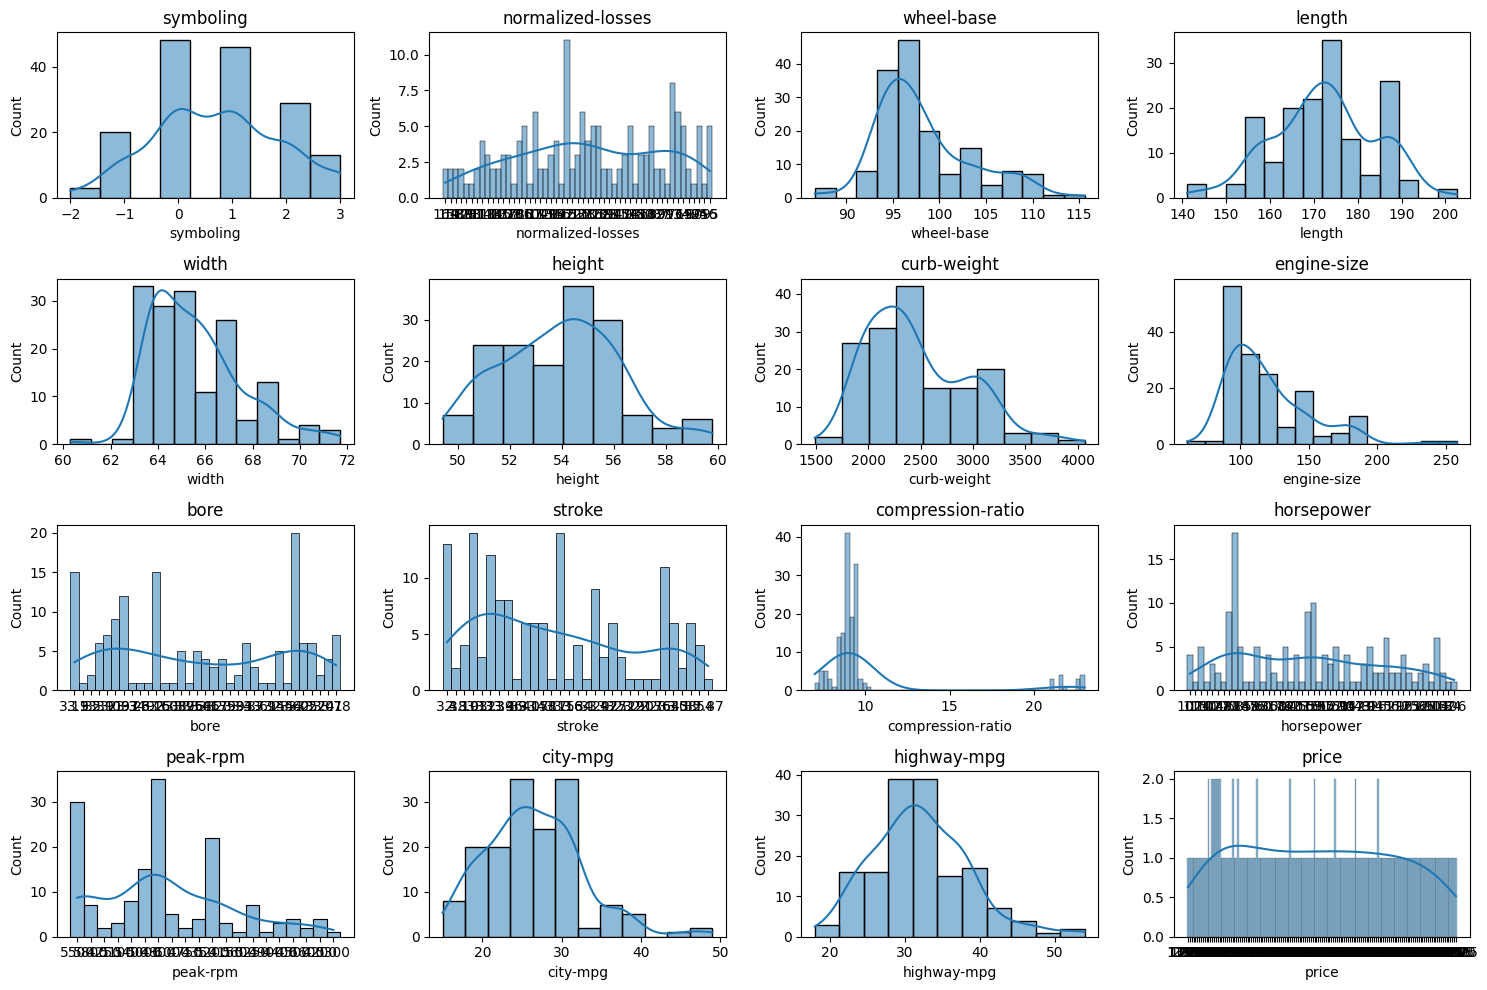

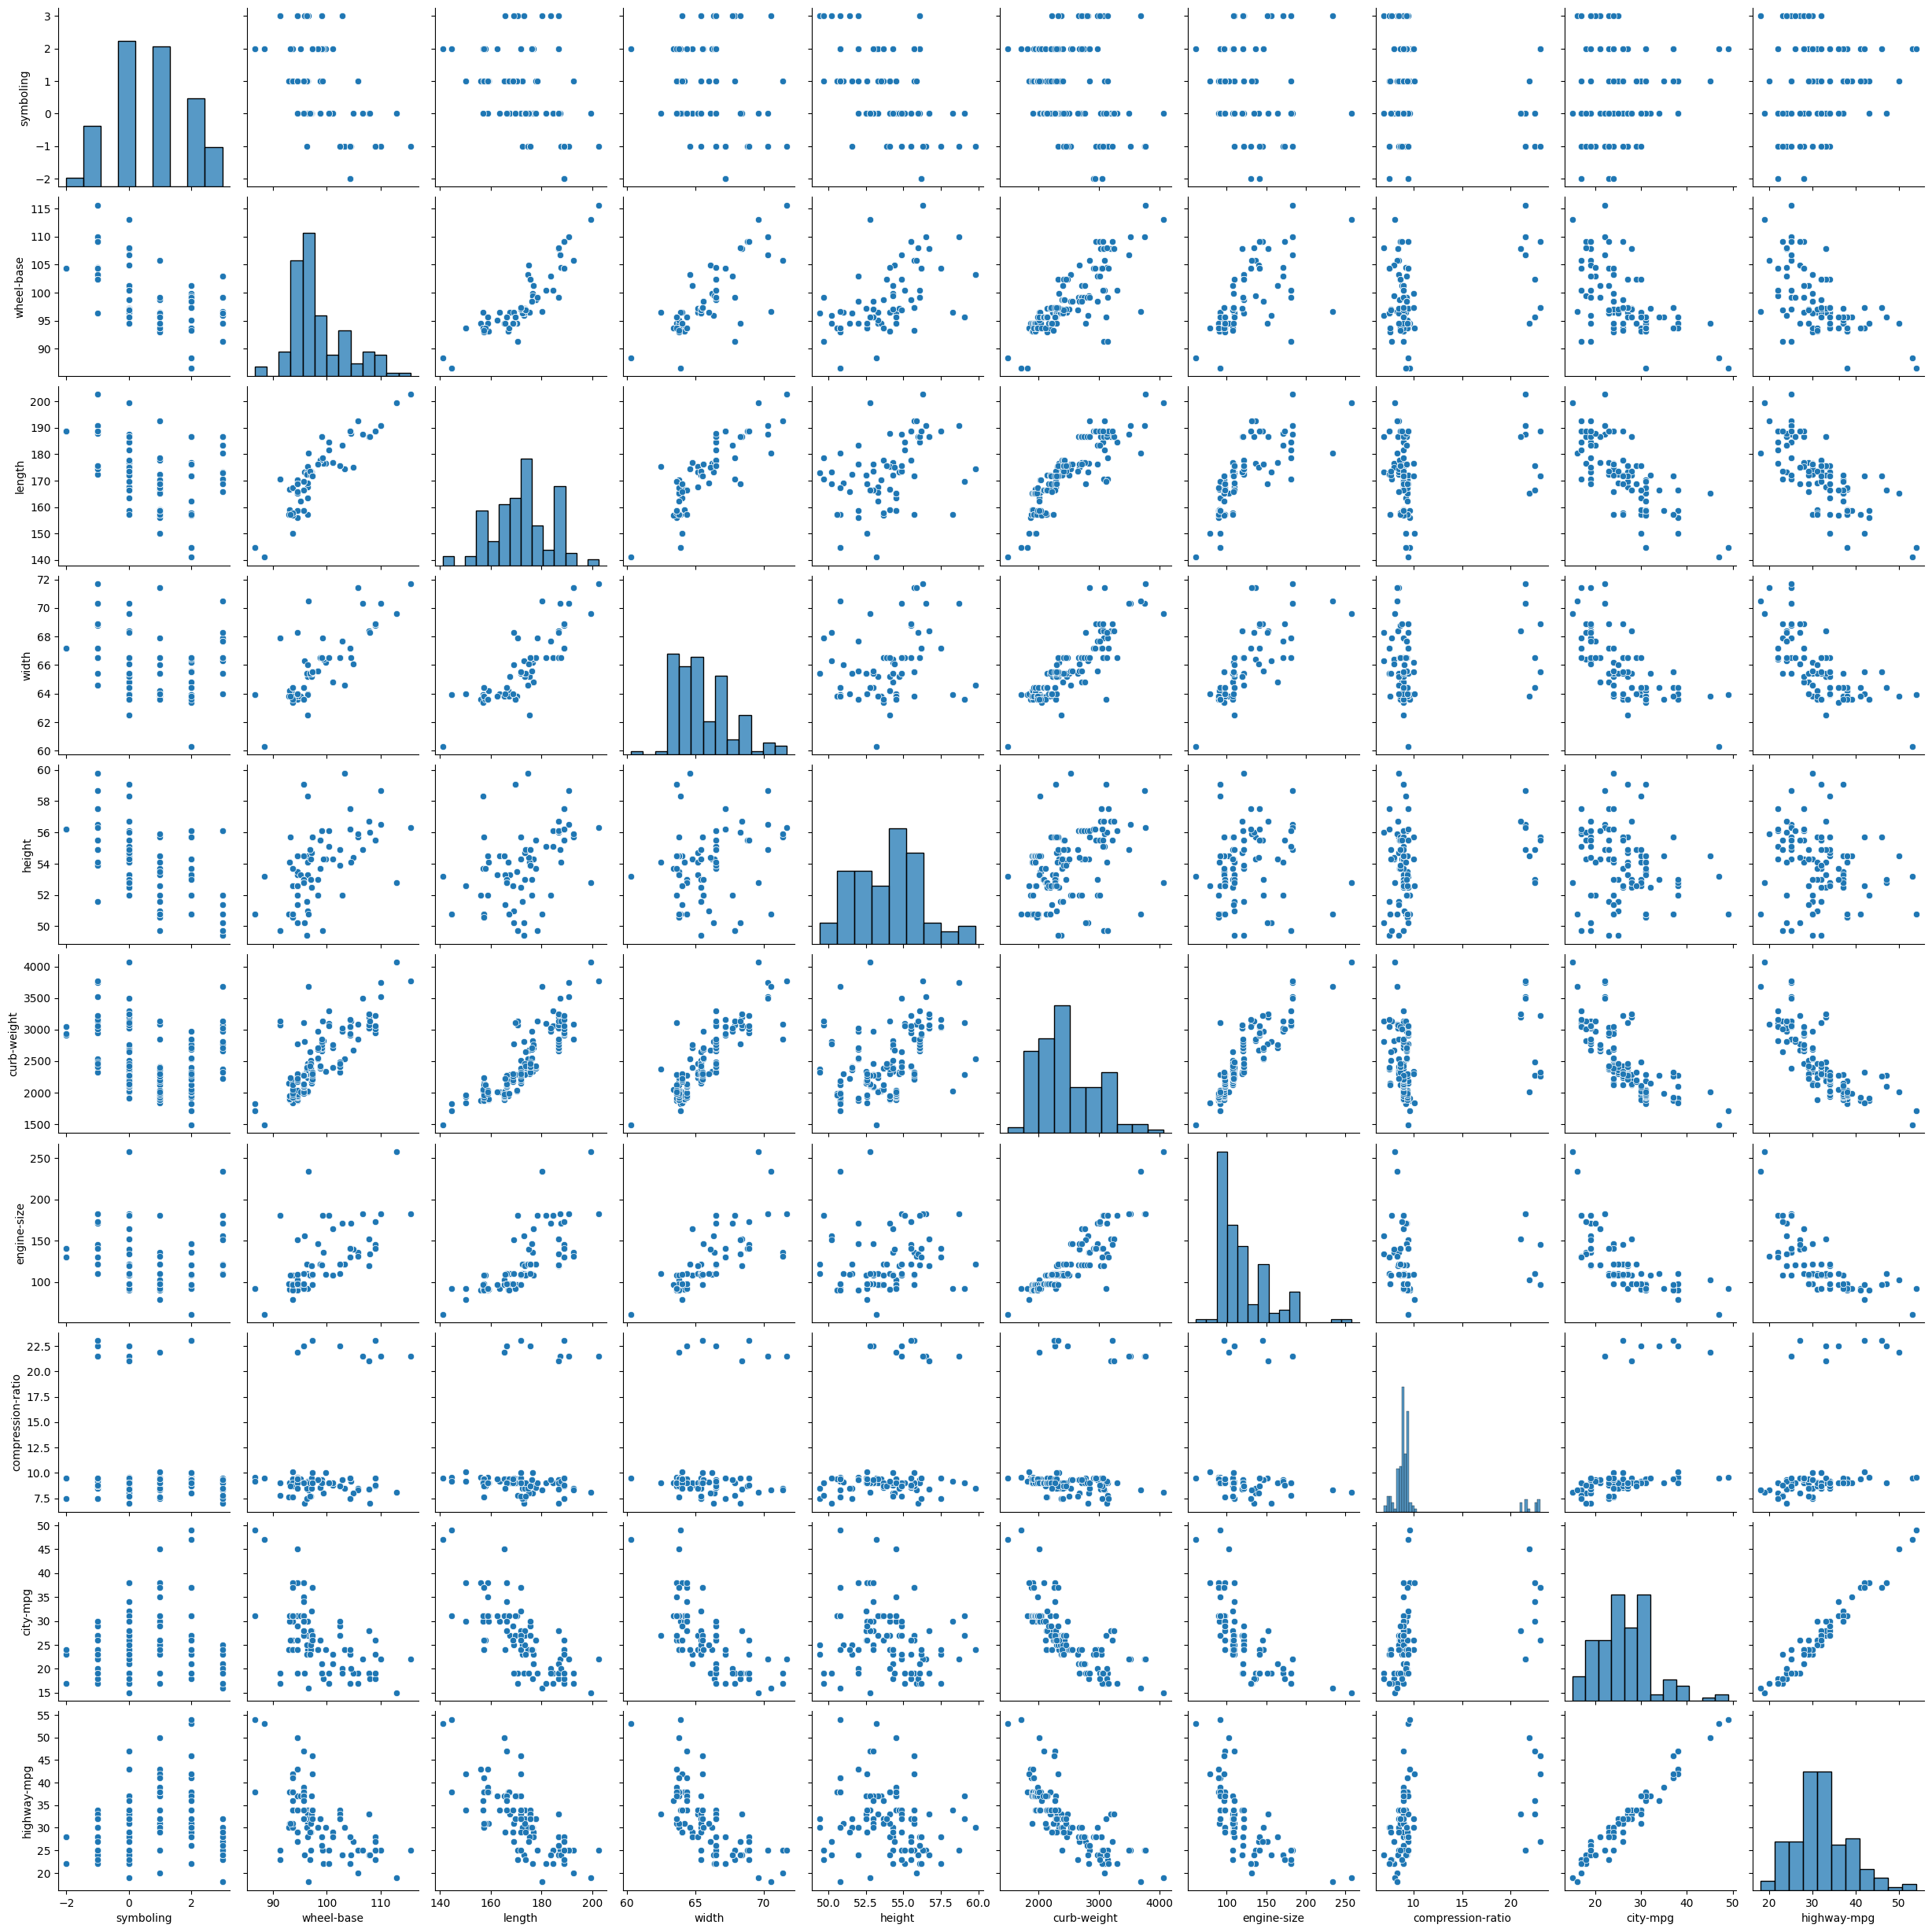

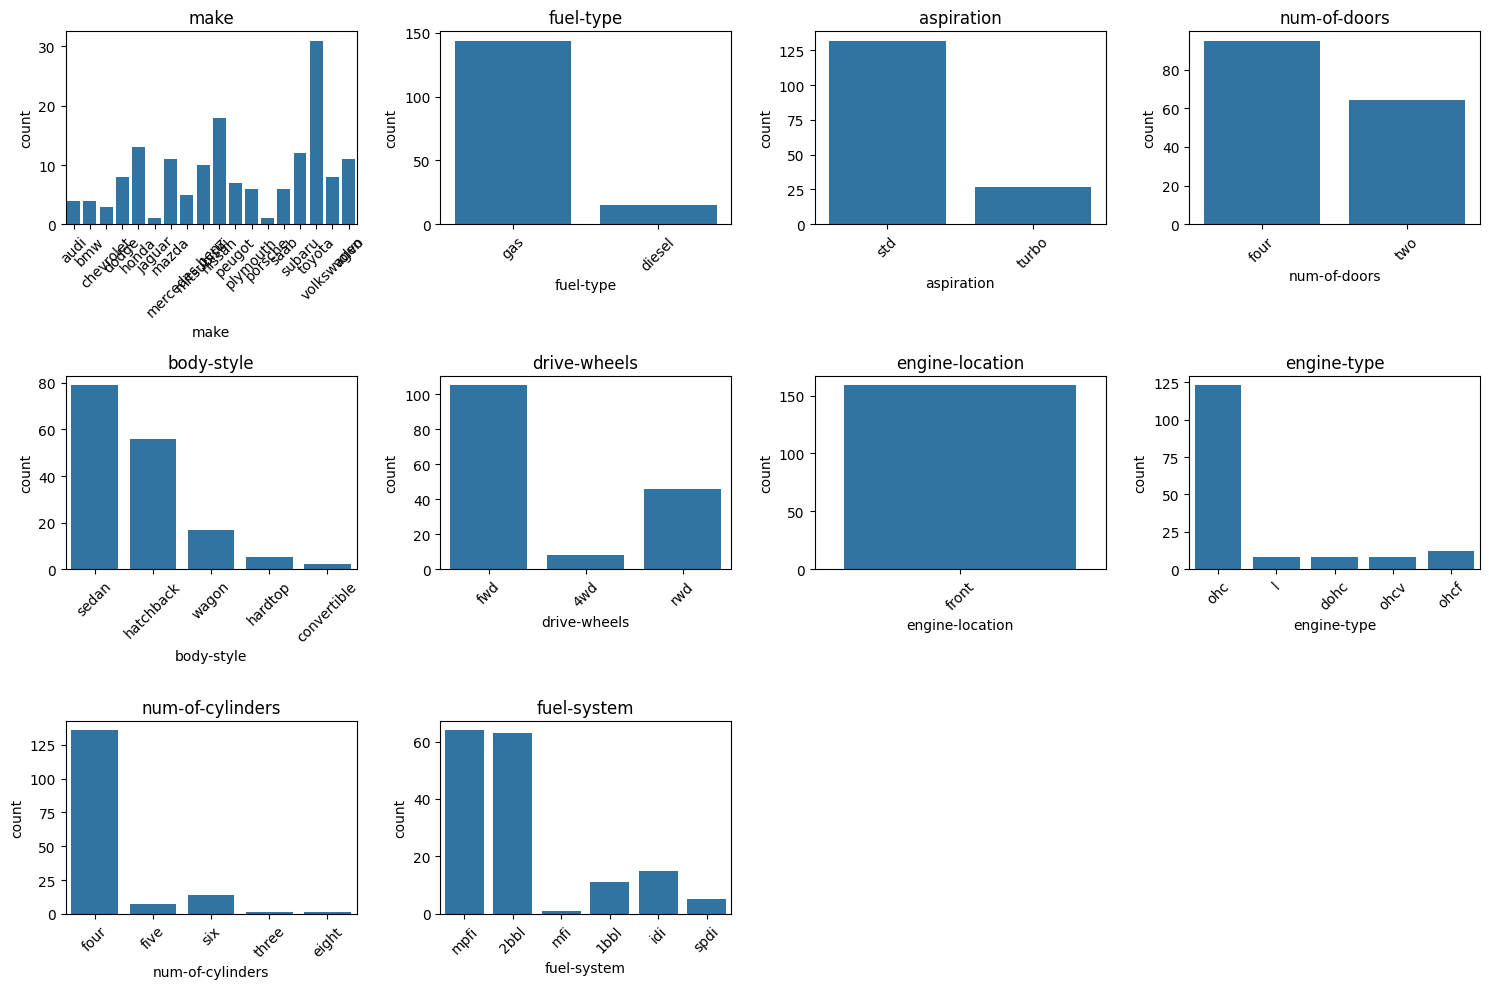

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numerical features
numerical_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
                  'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                  'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(auto_data[col], kde=True)  # Histogram with kernel density estimate
    plt.title(col)
plt.tight_layout()
plt.show()

# Explore relationship between numerical features
# Pairplot helps visualize relationships between numerical features
sns.pairplot(auto_data[numerical_cols])
plt.show()

# Visualize categorical features
categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                    'fuel-system']

# Plot count plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=col, data=auto_data)  # Countplot for categorical data
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Determining Optimal K Value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

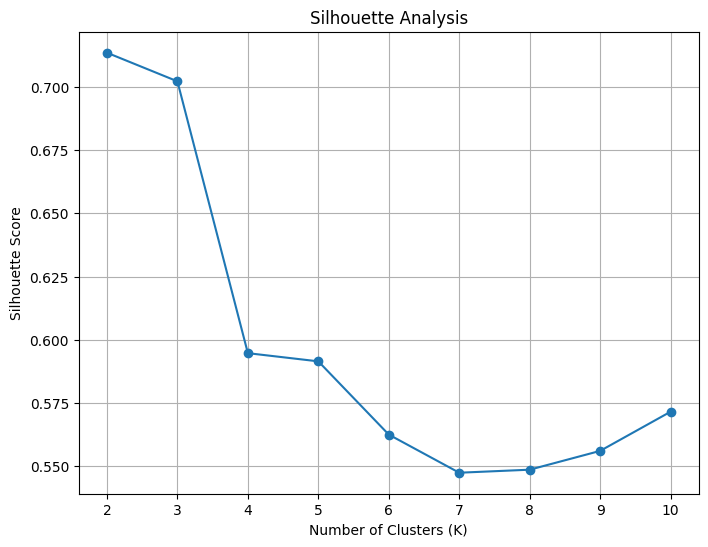

In [9]:
# Silhouette Analysis:

# Import KMeans and silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize KMeans for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(auto_data_encoded)
    silhouette_scores.append(silhouette_score(auto_data_encoded, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

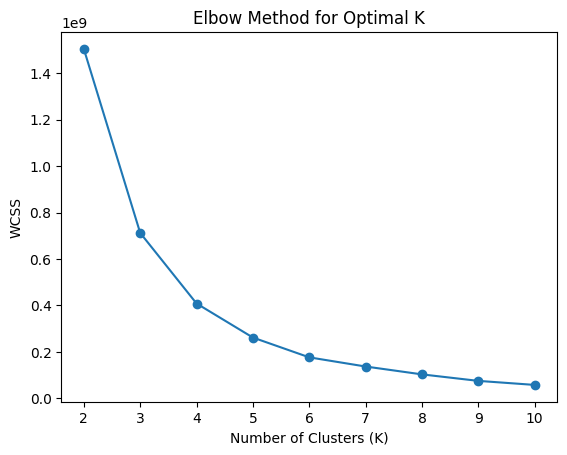

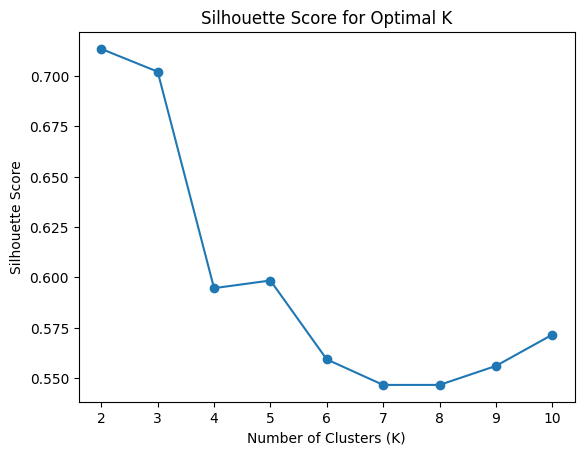

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
X = auto_data_encoded[numerical_cols]

# Initialize empty lists to store scores
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

# Try different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


Evaluation of Clustering Performance

Silhouette Score: 0.6378954452228206


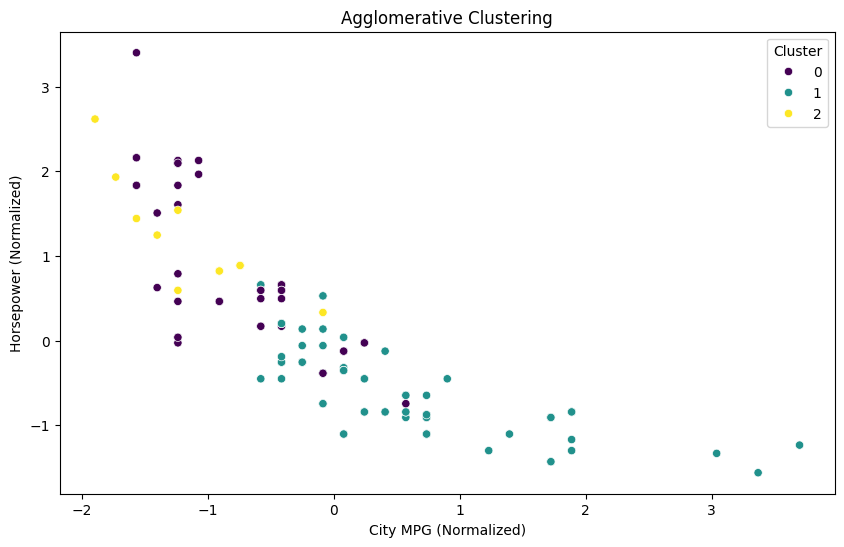

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)  # Creating a clustering model with 3 clusters

# Fit the model
agg_labels = agg_cluster.fit_predict(X)  # Applying the clustering model to the data and getting cluster labels

# Compute silhouette score
silhouette_avg = silhouette_score(X, agg_labels)  # Calculating the silhouette score to evaluate clustering quality
print("Silhouette Score:", silhouette_avg)  # Printing the silhouette score

# Visualize clusters
plt.figure(figsize=(10, 6))
# Scatter plot to visualize clusters based on two features: city MPG and horsepower
sns.scatterplot(x=X_scaled['city-mpg'], y=X_scaled['horsepower'], hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')  # Setting plot title
plt.xlabel('City MPG (Normalized)')  # Labeling x-axis
plt.ylabel('Horsepower (Normalized)')  # Labeling y-axis
plt.legend(title='Cluster')  # Adding legend for cluster labels
plt.show()


#CLUSTERING

Import necessary libraries

In [5]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print(auto_data.head())

    symboling normalized-losses  make fuel-type aspiration num-of-doors  \
3           2               164  audi       gas        std         four   
4           2               164  audi       gas        std         four   
6           1               158  audi       gas        std         four   
8           1               158  audi       gas      turbo         four   
10          2               192   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front        99.8  ...          109   
4       sedan          4wd           front        99.4  ...          136   
6       sedan          fwd           front       105.8  ...          136   
8       sedan          fwd           front       105.8  ...          131   
10      sedan          rwd           front       101.2  ...          108   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
3          

K-means clustering with K value finalization

In [6]:
# Determine the optimal number of clusters (K value)
silhouette_scores = []

# Loop through different K values from 2 to 10
for k in range(2, 11):
    # Initialize KMeans with current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit KMeans to the scaled data and get cluster labels
    cluster_labels = kmeans.fit_predict(X_scaled)
    # Calculate silhouette score for the current K value
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Choose the K value with the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Index starts from 0, so add 2 to get the actual K value

# Initialize K-means with the optimal K value
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
# Fit K-means to the scaled data and get cluster labels
kmeans_clusters = kmeans_final.fit_predict(X_scaled)

# Performance evaluation using silhouette score
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_clusters)
print("Silhouette score for K-means clustering:", kmeans_silhouette_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for K-means clustering: 0.29123178000080024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agglomerative Clustering

In [7]:
# Initialize Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)  # Creating an Agglomerative Clustering model with optimal K value
agg_clusters = agglomerative.fit_predict(X_scaled)  # Applying the clustering model to the scaled data and getting cluster labels

# Performance evaluation using silhouette score
agg_silhouette_score = silhouette_score(X_scaled, agg_clusters)  # Calculating the silhouette score for Agglomerative clustering
print("Silhouette score for Agglomerative clustering:", agg_silhouette_score)  # Printing the silhouette score


Silhouette score for Agglomerative clustering: 0.3163937578554791


**Comparative Analysis:**

In [8]:
print("Silhouette score for K-means clustering:", kmeans_silhouette_score)
print("Silhouette score for Agglomerative clustering:", agg_silhouette_score)
# Compare the silhouette scores of K-means and Agglomerative clustering
if kmeans_silhouette_score > agg_silhouette_score:
    print("K-means clustering performs better with a higher silhouette score.")
elif kmeans_silhouette_score < agg_silhouette_score:
    print("Agglomerative clustering performs better with a higher silhouette score.")
else:
    print("Both K-means and Agglomerative clustering have the same silhouette score.")


Silhouette score for K-means clustering: 0.29123178000080024
Silhouette score for Agglomerative clustering: 0.3163937578554791
Agglomerative clustering performs better with a higher silhouette score.



#Explanation of Results:
**Comparative Analysis of K-means and Agglomerative Clustering**

The automotive dataset comprises information about various attributes of automobiles, including symbolic risk assessment, normalized loss values, make, fuel type, body style, and technical specifications like engine size, horsepower, and price.

**K-means Clustering:**
- **Silhouette Score**: 0.2912
- **Interpretation**: K-means clustering identified a moderate level of cohesion and separation among clusters.
- **Strengths**:
  - Efficient for large datasets with a substantial number of observations.
  - Simple and easy to implement.
- **Weaknesses**:
  - Sensitive to initial cluster centroids, which may result in suboptimal clustering.
  - Assumes clusters are spherical and equally sized, which may not always be the case in real-world data.

**Agglomerative Clustering:**
- **Silhouette Score**: 0.3164
- **Interpretation**: Agglomerative clustering outperformed K-means with a higher silhouette score, indicating better-defined clusters.
- **Strengths**:
  - Does not require the number of clusters to be specified beforehand, making it more flexible.
  - Can capture non-spherical cluster shapes and uneven cluster sizes.
- **Weaknesses**:
  - Computationally intensive, especially for large datasets.
  - Memory-intensive as it requires storing the entire dataset to compute linkage distances.

**Comparative Analysis**:
- Agglomerative clustering demonstrated better performance compared to K-means in this analysis, as indicated by a higher silhouette score (0.3164 vs. 0.2912).
- Agglomerative clustering tends to perform well when there are clear hierarchical structures in the data or when clusters have irregular shapes and sizes.
- K-means, while computationally more efficient, struggled slightly with identifying well-separated clusters, likely due to the inherent assumptions it makes about the data distribution.
- Given the nature of the automotive dataset, where the attributes are diverse and may not necessarily form spherical clusters, Agglomerative clustering appears to be a more suitable choice for clustering analysis.
- However, it's essential to consider the specific goals of the analysis and the characteristics of the dataset when selecting a clustering algorithm.

